# Desafio (Parte 2) - Recomendação de Produtos

## Case baseado no desafio do Kaggle: "Instacart Market Basket Analysis"

Esse desafio é baseado em uma competição do Kaggle ([https://www.kaggle.com](https://www.kaggle.com)) de 2017, onde é pedido para fazer a predição de se um produto será comprado por dado usuário no carrinho atual, baseado em suas compras anteriores.

Link para o desafio: [https://www.kaggle.com/c/instacart-market-basket-analysis](https://www.kaggle.com/c/instacart-market-basket-analysis)

## Origem dos Dados:

Os dados mostrados nesse desafio são uma amostra extraída do dataset disponibilizado gratuitamente pela empresa Instacart ([https://www.instacart.com/](https://www.instacart.com/)) **\***. São dados reais do banco de dados da empresa, que foram anonimizados para o uso por pesquisadores e em competições de Data Science.

 
###### * “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from [https://www.instacart.com/datasets/grocery-shopping-2017](https://www.instacart.com/datasets/grocery-shopping-2017) on March 10, 2017.

___

# Imports

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
""" habilitando plots no notebook """
%matplotlib inline

In [3]:
""" plot libs """
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
""" Configurando o Matplotlib para o modo manual """
plt.interactive(False)

# Objetivo :

Analisar o dataset (o mesmo construído na Aula 07) e responder às questões em cada item usando gráficos.

# Importante:

Todos os gráficos devem conter:
* Título
* Rótulos do Eixo X e do Eixo Y

Se mais de um gráfico for plotado em uma única janela, eles devem ter:
* Cores diferentes
* Legenda
* Transparência (na sobreposição)

# Dataset:

O dataset utilizado nesse desafio é um sub-conjunto daquele construído na Aula 7. Para essa aula, será necessário carregar apenas duas colunas: `user_id` e `product_name`.

## Carregando os dados

In [5]:
""" Nota sobre o Warning: 
    O código abaixo levanta um Warning gerado por uma chamada interna do pandas conflitando com o Numpy.
    Não há necessidade de tratar esse Warning no momento, o comportamento do 'read_csv' é funcional para o que queremos.
"""
dataset = pd.read_csv(
    os.path.join("data", "dataset.csv"),
    usecols=["user_id", "product_name"],
    sep=",",
    index_col=0,
    encoding="utf-8"
)

C:\Users\allan\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Extração dos dados específicos

In [6]:
product_count = dataset.groupby("user_id").product_name.count()

In [7]:
product_count.describe()

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: product_name, dtype: float64

In [8]:
product_count.head(10)

user_id
1     11
2     31
5      9
7      9
8     18
9     22
10     4
13     5
14    11
17     6
Name: product_name, dtype: int64

# Problemas

## Conceito: Recomendação Simples de Produtos

Um sistema de recomendação bem rudimentar pode ser construído usando a teoria de [`Collaborative Filtering`](https://en.wikipedia.org/wiki/Collaborative_filtering). 

Na figura abaixo está mostrado um exemplo simples:

![Collaborative Filtering](images/Collaborative_filtering.gif)

A idéia principal é representar um `usuário` pelo seu `perfil de compras`, ou seja, o usuário será representado por **todos os produtos** que ele já comprou.

## Construção do Dataset

Como serão usados métodos computacionais muito pesados, será necessário reduzir bastante a quantidade de dados utilizados. Dessa forma, serão usados apenas os **1% dos dados de usuários que compraram mais produtos** do dataset.

### Selecionando os usuários

In [9]:
product_count.describe(percentiles=[.1, .25, .5, .75, .99])

count    114885.000000
mean         10.568394
std           7.946615
min           1.000000
10%           2.000000
25%           5.000000
50%           9.000000
75%          14.000000
99%          37.000000
max          80.000000
Name: product_name, dtype: float64

In [10]:
selected = product_count[product_count >= 37].index
selected.shape

(1194,)

In [11]:
dataset.loc[selected].shape

(51439, 1)

In [12]:
dataset.loc[selected].head()

,product_name
user_id,
238,Lunchables Turkey & American Cheese with Crackers
238,Light Red Raspberry Yogurt
238,Farmhouse Hearty White Bread
238,Lunchables Turkey & American Cheese Cracker St...
238,Strawberry Banana


### Criando a Tabela de Ocorrências

Uma `Tabela de Ocorrências` relaciona quantos produtos um usuário comprou **para cada produto**. 

Exemplo:

a) Dado Original:

| user_id | product_name  |
|:------- |:------------- |
| 12345   | Ground Coffee |
| 12345   | White Sugar   |
| 12345   | Bread         |
| 67890   | Ground Coffee |
| 67890   | A Type Milk   |
| 67890   | Vodka         |
| 67890   | Fudge Brownie |

b) Tabela de Ocorrências:

| user_id | Ground Coffee | White Sugar   | Bread         | A Type Milk   | Vodka         | Fudge Brownie |
|:------- |:------------- |:------------- |:------------- |:------------- |:------------- |:------------- |
| 12345   | 1             | 1             | 1             | 0             | 0             | 0             |
| 67890   | 1             | 0             | 0             | 1             | 1             | 1             |




In [13]:
temp = dataset.loc[selected].reset_index()
users = temp.user_id
prods = temp.product_name

In [14]:
user_prod = pd.crosstab(users, prods)
user_prod.head(10)

product_name,& Go! Hazelnut Spread + Pretzel Sticks,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Vanilla Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",1 % Lowfat Milk,1 Apple + 1 Mango Fruit Bar,...,from Concentrate Mango Nectar,gelato Coffee Toffee,in 100% Juice Mixed Fruit,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders
user_id,,,,,,,,,,,,,,,,,,,,,
238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Redução de Dimensionalidade

A `Tabela de Ocorrências` é uma matriz muito grande e muito **esparsa**, i.e. possui muitas colunas e pouca informação. Por pouca informação pode-se entender que menos de 1% da matriz é composta por elementos **não zeros**.

Para esse tipo de dado, em que é necessária muita memória e processamento para se extrair informações relevantes, usam-se técnicas de **redução de dimensionalidade**. Essas técnicas têm como objetivo condensar (ou mesmo comprimir) a informação esparsa em uma representação muito menor e densa.

Nesse desafio será utilizado a técnica linear de extração de componentes principais, ou `Principal Component Analysis` (`PCA`). Para saber mais sobre essa ferramenta, veja os links abaixo:

- [Teoria do PCA (Wikipédia)](https://en.wikipedia.org/wiki/Principal_component_analysis)
- [Implementação do Scikit-Learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

A figura abaixo mostra um exemplo de PCA aplicado a um conjunto de dados de 2 variáveis (`x` e `y`). Pode-se observar que os novos eixos encontrados descrevem muito mais facilmente a distribuição de dados do que os eixos de `x` e `y` originais.

![GaussianScatterPCA](images/GaussianScatterPCA.svg)


Sem entrar muito em detalhes técnicos de implementação do PCA, essa técnica descorrelaciona (torna **linearmente independentes**) os dados originais e os ordena do mais importante (i.e. aquele que carrega **mais informação**) para o menos; com isso, pode-se escolher manter apenas as nosvas dimensões que **melhor explicam** os dados e jogar fora o resto. 

Nesse desafio, vamos reduzir a tabela de dados das `12.962` colunass originais para apenas `100` usando a implementação de PCA do `scikit-learn`. 

In [15]:
from sklearn.decomposition import PCA

user_prod_pca = pd.DataFrame(
    index=user_prod.index,
    data=PCA(100).fit_transform(user_prod)
)
user_prod_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
user_id,,,,,,,,,,,,,,,,,,,,,
238,-0.976656,-0.564292,-0.190354,0.136275,-0.043611,-0.138093,-0.196773,-0.069032,-0.234705,0.106199,...,0.877707,-0.191119,-0.170870,-0.082786,-0.712606,0.472513,0.362663,0.399214,0.267869,-0.216680
375,-0.127334,-0.063304,0.092130,0.727018,-1.127461,-0.315017,0.005534,-0.335344,-0.609433,0.286896,...,-0.337325,0.465568,0.272040,-0.156837,0.065584,-0.104614,0.528349,-0.490445,0.228660,0.381709
863,1.093155,-0.430330,-0.195177,0.505855,-1.103811,0.436872,-0.517477,0.883319,-0.665449,-0.349333,...,-0.568914,-0.005942,0.055952,0.170769,0.055312,-0.139073,0.500219,0.105711,0.538248,-0.335241
890,0.863730,-0.164227,-0.143021,0.383621,0.202321,-0.539496,-0.421890,-0.291864,0.473194,0.302366,...,0.020949,0.224695,-0.064204,0.239383,-0.093449,-0.184183,0.053971,0.117975,-0.247910,0.185628
982,-0.166054,0.229982,0.808857,0.127204,-0.530998,-0.488505,0.069927,0.187332,0.346359,-0.041863,...,-0.044076,-0.343074,-0.285016,0.147029,-0.586486,0.156689,0.096073,-0.265656,0.189357,-0.376611


Para toda a Parte 2 do desafio, será usada a tabela gerada por PCA `user_prod_pca`. 

## A) Visualização e Seleção dos Usuários

Como o PCA ordena as _features_ da mais importante para a menos importante, as duas primeiras colunas da tabela `user_prod_pca` podem ser usadas para visualização dos usuários do sistema. 

Como temos muitos usuários ainda (`1.194`), será necessário escolher alguns poucos para observar a `similaridade` entre eles.   



### A.1) Visualização

Crie um `scatter plot` que mostra a representação 2D de todos os usuários em `user_prod_pca` usando as colunas `0` para  o eixo `x` e a coluna `1` para o eixo `y`. 

Esse gráfico deve ter as seguintes características:
* Tamanho da Figura: 15 x 15
* Título e Rótulos para os eixos X e Y
* Tamanho do símbolo no mínimo igual a 60
* Transparência, para verificar dados que eventualmente se sobreponham.

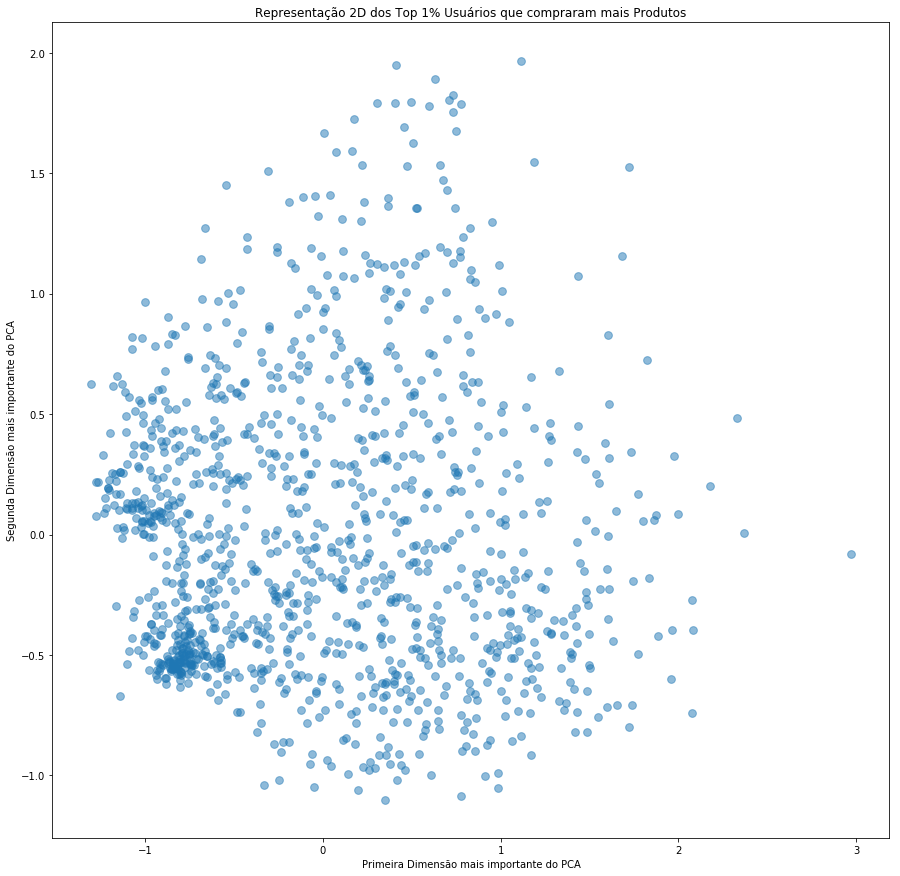

In [16]:
user_prod_pca.plot(
    kind="scatter", 
    x=0, y=1,    
    s=60,
    alpha=0.5,
    figsize=(15,15)
)
plt.title("Representação 2D dos Top 1% Usuários que compraram mais Produtos")
plt.xlabel("Primeira Dimensão mais importante do PCA")
plt.ylabel("Segunda Dimensão mais importante do PCA")
plt.show()

### A.2) Seleção

Crie outro `scatter plot` que mostra apenas uma parte do domínio onde há uma maior concentração de usuários; esse gráfico será parecido com um **zoom** nessa parte do domínio. 

Sugestão do corte:
- `-0.7 < X < -0.5`
- `-0.6 < Y < -0.4`

Esse gráfico deve ter as mesmas características do anterior e ainda mostrar, para cada usuário, o texto contendo seu `user_id`.

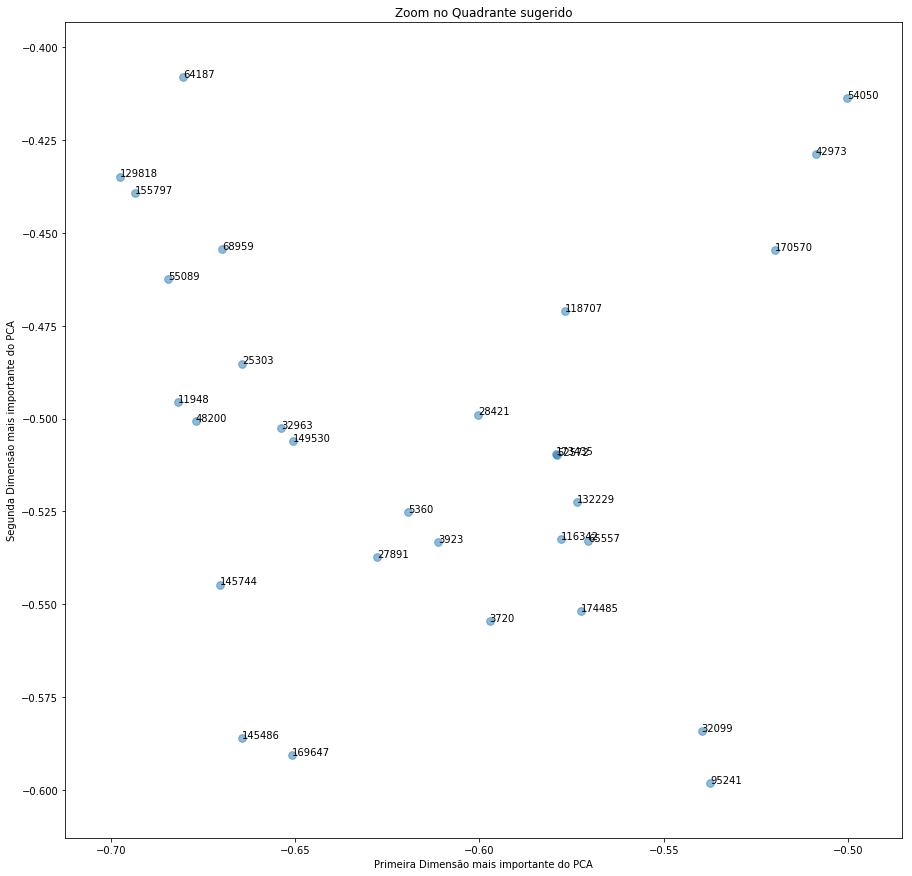

In [17]:
index = (user_prod_pca.loc[:, 0] >= -0.7) & \
        (user_prod_pca.loc[:, 0] < -0.5) & \
        (user_prod_pca.loc[:, 1] >= -0.6) & \
        (user_prod_pca.loc[:, 1] < -0.4)

selected_users = user_prod_pca[index]

selected_users.plot(
    kind="scatter", 
    x=0, y=1,    
    s=60,
    alpha=0.5,
    figsize=(15,15)
)

for label, x, y in selected_users.reset_index().values[:, :3]:
    plt.text(x=x, y=y, s=int(label))
    
plt.title("Zoom no Quadrante sugerido")
plt.xlabel("Primeira Dimensão mais importante do PCA")
plt.ylabel("Segunda Dimensão mais importante do PCA")

plt.show()

## B) Similaridade usando Correlação entre Usuários

Para saber se um usuário é `similar` a outro, pode-se utilizar várias métricas de similaridade. Como o método de redução de dimensionalidade escolhido é linear, pode-se usar o `coeficiente de correlação de Pearson` entre as representações de dimensão `100` dos usuários como métrica de similaridade. Para saber mais sobre a correlação de Pearson, veja [este link da Wikipédia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

A interpretação do coeficiente `r` como métrica de similaridade é a seguinte:
* Se `|r|` é próximo de `1`, os elementos são **muito similares**;
* Se `|r|` é próximo de `0`, os elementos são **muito diferentes**.


### B.1) Visualização da Correlação

Selecione `10` usuários do `item A`, dentre próximos e distantes, e visualize a `correlação` entre todos eles.

Dica 1: use um método que mostre a correlação de todos contra todos em vez de criar uma visualização para cada dupla.

Dica 2: A maioria das funções de correlação enxergam os dados por coluna em vez de linhas; tente transpor a sua matriz caso o resultado esteja estranho. 

##### Nota

Para que seja possível processar os dados sem problemas de memória, serão selecionados de 3 a 6 usuários com as maiores e as menores correlações.

In [18]:
# calculando matriz de correlações e transformando em uma Series
correlacoes = selected_users.T.corr()
correlacoes = correlacoes.stack()
correlacoes = correlacoes.to_frame().rename(columns={0: "correl"})

# ordenando os user_ids para identificar duplicatas
correlacoes.index = correlacoes.index.rename(names=["user_1", "user_2"])
correlacoes = correlacoes.reset_index()
correlacoes[["user_1", "user_2"]] = correlacoes[["user_1", "user_2"]].apply(sorted, axis=1)

# eliminando autocorrelações
correlacoes = correlacoes[correlacoes.user_1 != correlacoes.user_2]

# eliminando correlações duplicadas
correlacoes = correlacoes.drop_duplicates()

# ordenando as correlações
correlacoes = correlacoes.sort_values(by="correl")

# usando user_1 e user_2 como indices
correlacoes = correlacoes.set_index(["user_1", "user_2"])

correlacoes

,,correl
user_1,user_2,
169647,170570,-0.143260
5360,32099,-0.068567
55089,116342,-0.058036
32099,68959,-0.046218
132229,145744,-0.045396
54050,169647,-0.040905
32099,170570,-0.039379
95241,174485,-0.034871
54050,68959,-0.029224


In [19]:
index = pd.MultiIndex.from_tuples(
    [
        correlacoes.correl.argmin(),           # maior correlação negativa absoluta
        correlacoes.correl.map(abs).argmin(),  # menor correlação absoluta
        correlacoes.correl.argmax(),           # maior correlação positiva absoluta
    ], 
    names=["user_1", "user_2"]
)
correlacoes.loc[index]

,,correl
user_1,user_2,
169647,170570,-0.14326
32099,145744,0.00140
5360,169647,0.67841


In [20]:
u_ids = pd.unique(index.to_frame().values.reshape((6)))
selected_correl = selected_users.loc[u_ids].T.corr()
selected_correl

user_id,169647,170570,32099,145744,5360
user_id,,,,,
169647,1.000000,-0.143260,-0.027590,0.043595,0.678410
170570,-0.143260,1.000000,-0.039379,0.127364,0.054509
32099,-0.027590,-0.039379,1.000000,0.001400,-0.068567
145744,0.043595,0.127364,0.001400,1.000000,0.132108
5360,0.678410,0.054509,-0.068567,0.132108,1.000000


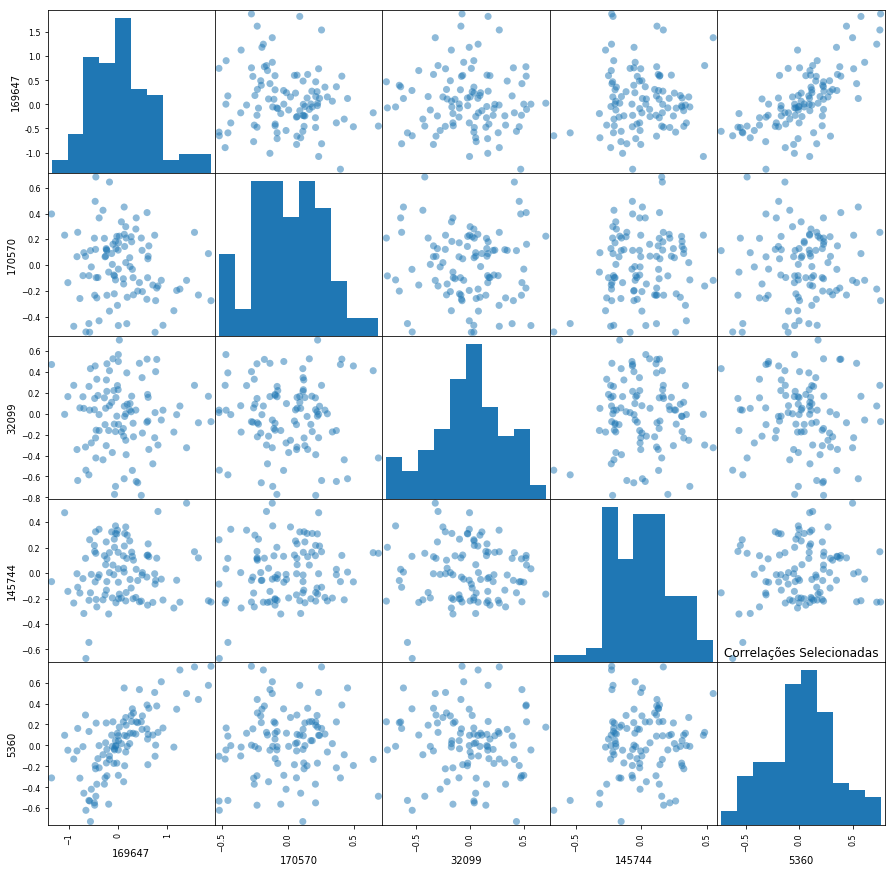

In [21]:
pd.plotting.scatter_matrix(
    selected_users.T.loc[:, u_ids], 
    figsize=(15, 15), 
    s=200,                            # Tamanho do Marker para o Scatter Plot
    alpha=.5                          # Transparência para o Scatter Plot
)

plt.title("Correlações Selecionadas")
plt.show()

### B.2) Verificando a Similaridade das Compras dos Usuários

Escolha dois usuários com uma correlação alta e verifique os produtos que ambos compraram. Faça o mesmo depois para usuários de correlação baixa.

##### Correlação Alta

In [22]:
user_id_1 = 5360
prods_user_1 = user_prod.columns[user_prod.loc[user_id_1].astype(bool)]

user_id_2 = 169647
prods_user_2 = user_prod.columns[user_prod.loc[user_id_2].astype(bool)]

# quantidade de produtos para ambos os usuários
print("User {}: {} produtos".format(user_id_1, prods_user_1.shape[0]))
print("User {}: {} produtos".format(user_id_2, prods_user_2.shape[0]))

User 5360: 41 produtos
User 169647: 75 produtos


In [23]:
# produtos em comum
common_prods = prods_user_1 & prods_user_2
print("Produtos em Comum: {} produtos".format(common_prods.shape[0]))
print(" - " + "\n - ".join(common_prods.sort_values()))

Produtos em Comum: 12 produtos
 - Dark Coconut Toffee Organic Chocolate
 - Organic Deep Dark Sea Salt Chocolate
 - Organic Orange Fruit Juice
 - Organic Quinoa Dark Chocolate Bar
 - Organic Raw Multigreen Kobmbucha
 - Organic Reduced Fat 2% Milk
 - Peanut Butter Whole Grain Clusters
 - Sweet Batard
 - Thick & Crispy Tortilla Chips
 - Thin & Light Tortilla Chips
 - Total 2% Greek Strained Yogurt with Cherry 5.3 oz
 - Total 2% Lowfat Greek Strained Yogurt with Peach


In [24]:
# Produtos Exclusivos do User 1
excllusive_prods = prods_user_1.difference(prods_user_2)
print("Produtos Exclusivos no User 1: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos no User 1: 29 produtos
 - 70% Dark Chocolate Bar
 - Almonds & Sea Salt in Dark Chocolate
 - Blackberry Yogurt
 - Coffee Crunch In Dark Chocolate
 - Cold-Pressed Organic Apple
 - Finocchiona Salami
 - Healthy Grains Oats & Honey Clusters with Toasted Coconut Gluten Free
 - Hibiscus Organic Raw Kombucha
 - Kombucha  Bilberry No. 9
 - Mexican Chocolate Yogurt
 - Mortadella
 - Olive Bread
 - Organic Cultured Cream Cheese Spread
 - Organic Dark Salted Burnt Caramel Chocolate Bar
 - Organic Teas Black Tea Organic English Breakfast Tea Bags - 16 CT
 - Passionberry Bliss Kombucha Drink
 - Peach Pear Flavored Sparkling Water
 - Peanut Butter Cereal
 - Pita Chips Simply Naked
 - Potato Chip Milk Chocolate
 - Rich Dark Chocolate
 - Small Walnut Levain Bread
 - Synergy Organic & Raw Green Chia Kombucha
 - Total 0% Cherry Nonfat Yogurt
 - Total 2% All Natural Greek Strained Yogurt with Honey
 - Total 2% Lowfat Greek Strained Yogurt With Blueberry
 - Total 2% Yogurt Key Lime
 - T

In [25]:
# Produtos Exclusivos do User 2
excllusive_prods = prods_user_2.difference(prods_user_1)
print("Produtos Exclusivos do User 2: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos do User 2: 63 produtos
 - 100% Apple Juice
 - 100% Lime Juice
 - 6 OZ LA PANZANELLA CROSTINI ORIGINAL CRACKERS
 - 72% Cacao Twilight Delight Intense Dark Bar
 - Ale, Hop Stoopid
 - Big Eye IPA
 - Carrot Sticks
 - Celery Sticks
 - Chocolate Milk 1% Milkfat
 - Coconut Water
 - Crispy Sea Salt Baked Gourmet Crackers
 - Dark Belgian Beer
 - Dark Chocolate, Stone Ground, Organic, Toffee Almond & Sea Salt
 - English Breakfast Tea Bags
 - Enlightened Organic Raw Kombucha
 - Excellence 85% Cocoa Extra Dark Chocolate
 - Fresh Roasted Tomate & Chile Asado Medium Salsa
 - Fresh Squeezed IPA
 - Garlic & Wine Sopressata Salami
 - Green Tea With Ginseng and Honey
 - Hazelnut Toffee Dark Chocolate Bar
 - Honey Bunches of Oats Honey Roasted with Almonds Cereal
 - Icelandic Style Fat Free Plain Yogurt
 - Italian Batard
 - Jacob's Wonderbar Dark Roast
 - Kombucha Organic & Raw Tantric Tumeric
 - Kombucha, Organic Raw, Lavender No. 3
 - Mint Ice Cream Sandwiches
 - Natural 72% Dark Ch

##### Correlação Baixa

In [26]:
user_id_1 = 5360
prods_user_1 = user_prod.columns[user_prod.loc[user_id_1].astype(bool)]

user_id_2 = 32099
prods_user_2 = user_prod.columns[user_prod.loc[user_id_2].astype(bool)]

# quantidade de produtos para ambos os usuários
print("User {}: {} produtos".format(user_id_1, prods_user_1.shape[0]))
print("User {}: {} produtos".format(user_id_2, prods_user_2.shape[0]))

User 5360: 41 produtos
User 32099: 47 produtos


In [27]:
# produtos em comum
common_prods = prods_user_1 & prods_user_2
print("Produtos em Comum: {} produtos".format(common_prods.shape[0]))
print(" - " + "\n - ".join(common_prods.sort_values()))

Produtos em Comum: 0 produtos
 - 


In [28]:
# Produtos Exclusivos do User 1
excllusive_prods = prods_user_1.difference(prods_user_2)
print("Produtos Exclusivos no User 1: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos no User 1: 41 produtos
 - 70% Dark Chocolate Bar
 - Almonds & Sea Salt in Dark Chocolate
 - Blackberry Yogurt
 - Coffee Crunch In Dark Chocolate
 - Cold-Pressed Organic Apple
 - Dark Coconut Toffee Organic Chocolate
 - Finocchiona Salami
 - Healthy Grains Oats & Honey Clusters with Toasted Coconut Gluten Free
 - Hibiscus Organic Raw Kombucha
 - Kombucha  Bilberry No. 9
 - Mexican Chocolate Yogurt
 - Mortadella
 - Olive Bread
 - Organic Cultured Cream Cheese Spread
 - Organic Dark Salted Burnt Caramel Chocolate Bar
 - Organic Deep Dark Sea Salt Chocolate
 - Organic Orange Fruit Juice
 - Organic Quinoa Dark Chocolate Bar
 - Organic Raw Multigreen Kobmbucha
 - Organic Reduced Fat 2% Milk
 - Organic Teas Black Tea Organic English Breakfast Tea Bags - 16 CT
 - Passionberry Bliss Kombucha Drink
 - Peach Pear Flavored Sparkling Water
 - Peanut Butter Cereal
 - Peanut Butter Whole Grain Clusters
 - Pita Chips Simply Naked
 - Potato Chip Milk Chocolate
 - Rich Dark Chocolate

In [29]:
# Produtos Exclusivos do User 2
excllusive_prods = prods_user_2.difference(prods_user_1)
print("Produtos Exclusivos do User 2: {} produtos".format(excllusive_prods.shape[0]))
print(" - " + "\n - ".join(excllusive_prods.sort_values()))

Produtos Exclusivos do User 2: 47 produtos
 - Baby Swiss Cheese
 - Blueberry on the Bottom Nonfat Greek Yogurt
 - Bread Rolls
 - Cherubs Heavenly Salad Tomatoes
 - Classic Hummus
 - Classic with Tuna Anchovies & Whitefish Cat Food
 - Coconut Blended Greek Yogurt
 - Coke Classic
 - Concentrated Bleach, Regular
 - Corn Chips
 - European Cucumber
 - Fabric Softener Sheets
 - Fabric Softener Sheets, Outdoor Fresh scent
 - Hampshire 100% Natural Sour Cream
 - Iceberg Lettuce
 - Italian Chopped Tomatoes
 - Jet-Dry Original Rinse Aid
 - Large Grapefruit
 - Large Organic Omega3 Brown Eggs
 - Lemon Natural Dishwasher Detergent Gel
 - Mamma Bella's Recipe Garlic Bread
 - Meyer Lemon
 - Natural Artesian Water, Mini & Mobile
 - Nature's Calorie-Free Sweetener
 - Non Fat Black Cherry on the Bottom Greek Yogurt
 - Organic Granny Smith Apple
 - Organic Natural Creations Light in Sodium Creamy Garden Tomato Soup
 - Organic Peeled Whole Baby Carrots
 - Organic Raspberries
 - Original Ranch Salad Dressi